In [ ]:
import os
import zipfile 
import gdown
from tqdm import tqdm




## Fetch data from Google Drive 
# Root directory for the dataset
data_root = 'dataset'
# Path to folder with the dataset
dataset_folder = f'{data_root}/img_align_celeba'
# URL for the CelebA dataset
url1 = 'https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM'
url2 = 'https://drive.google.com/uc?id=1mcqEu1vN1BUQ8IkEqXd3f54eaVxQsLIO'
# Path to download the dataset to
download_path1 = f'{data_root}/img_align_celeba.zip'
download_path2 = f'{data_root}/list_attr_celeba.csv'
# Create required directories 
if not os.path.exists(data_root):
  os.makedirs(data_root)
  os.makedirs(dataset_folder)

# Download the dataset from google drive
if not os.path.exists(download_path1):
  gdown.download(url1, download_path1, quiet=False)
if not os.path.exists(download_path2):
  gdown.download(url2, download_path2, quiet=False)


with zipfile.ZipFile(download_path1, 'r') as ziphandler:
    for file in tqdm(ziphandler.namelist(), desc='Extraction du fichier'):
        ziphandler.extract(file, dataset_folder)

## Test Preprocess


In [ ]:
!python PreProcess.py --root-images "./dataset/img_align_celeba/img_align_celeba" --root-attributes "./dataset/list_attr_celeba.csv"
# ou lance directement la commande dans le terminal << python PreProcess.py --root-images "./dataset/img_align_celeba/img_align_celeba" --root-attributes "./dataset/list_attr_celeba.csv" >>

## Test data.py

In [29]:
import torch
data = torch.load('processed_attributes')

In [68]:
a = data['Male']

In [75]:
torch.Tensor(a).long()

tensor([0, 0, 1,  ..., 1, 0, 0])

In [67]:

attri = []
for keys in data :
    attri.append(data[keys][0])
attri = attri[0:4])
torch.Tensor(attri)

C:\Users\massy\AppData\Local\Temp\ipykernel_16988\2793370446.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  attri = torch.tensor(attri[0:4])


tensor([False,  True,  True, False])

In [ ]:
['dfgdfg','zsdsds']

In [ ]:
for i in ['dfgdfg','zsdsds']
    e = torch.Tensor(data[i])
    sdqd.append(e)

In [49]:
a = torch.Tensor(data['Male']).device(0)
b = torch.Tensor(data['Smiling'])
e = torch.Tensor(data['Smiling'])
c = torch.stack((a,b,e))

In [50]:
(c).shape

torch.Size([3, 202599])

In [58]:
c[2,:].all() == e.all()

tensor(True)

In [77]:
import torch

# Exemple de tenseur
tenseur_original = torch.Tensor(data['Male']).long()

# Fonction de mapping
def mapper(valeur):
    if valeur == 0.:
        return [0, 1]
    elif valeur == 1.:
        return [1, 0]

# Application du mapping
tenseur_mappé = torch.tensor([mapper(v) for v in tenseur_original])

# Affichage du résultat
print(tenseur_mappé)


tensor([[0, 1],
        [0, 1],
        [1, 0],
        ...,
        [1, 0],
        [0, 1],
        [0, 1]])


In [ ]:
[[0,1],[1,0]]

In [1]:
import torch
from torchvision.transforms import Compose, Lambda

def target_transform_binary_alternative():
    def onehot_to_binary_alternative(x):
        # Créer un tensor pour le résultat
        z = torch.zeros(2 * x.numel(), dtype=x.dtype)

        # Pour chaque élément, définir la valeur correspondante
        for i in range(x.numel()):
            z[2*i] = x[i]    # Valeur présente
            z[2*i + 1] = 1 - x[i]  # Valeur absente

        return z

    return Compose([
        Lambda(onehot_to_binary_alternative),
    ])

# Exemple d'utilisation
transform = target_transform_binary_alternative()

# Exemple de vecteur one-hot
one_hot_vector = torch.tensor([1, 0, 0, 1])
binary_transformed = transform(one_hot_vector)

print("Vecteur one-hot original:", one_hot_vector)
print("Vecteur transformé en binaire:", binary_transformed)


Vecteur one-hot original: tensor([1, 0, 0, 1])
Vecteur transformé en binaire: tensor([1, 0, 0, 1, 0, 1, 1, 0])


In [4]:
from glob import glob
import os
files = glob(os.path.join("resized_images/", f"*.jpg"))

In [6]:
len(files)

202599

In [6]:
import torch
data = torch.load('processed_attributes')
type(data)

dict

In [7]:
data

{'5_o_Clock_Shadow': array([False, False, False, ..., False, False, False]),
 'Arched_Eyebrows': array([ True, False, False, ..., False,  True,  True]),
 'Attractive': array([ True, False, False, ..., False,  True,  True]),
 'Bags_Under_Eyes': array([False,  True, False, ..., False, False, False]),
 'Bald': array([False, False, False, ..., False, False, False]),
 'Bangs': array([False, False, False, ..., False, False, False]),
 'Big_Lips': array([False, False,  True, ..., False,  True, False]),
 'Big_Nose': array([False,  True, False, ..., False, False, False]),
 'Black_Hair': array([False, False, False, ...,  True,  True, False]),
 'Blond_Hair': array([False, False, False, ..., False, False,  True]),
 'Blurry': array([False, False,  True, ..., False, False, False]),
 'Brown_Hair': array([ True,  True, False, ..., False, False, False]),
 'Bushy_Eyebrows': array([False, False, False, ..., False,  True, False]),
 'Chubby': array([False, False, False, ..., False, False, False]),
 'Double_

In [8]:
from data import Datasets

test = Datasets(root_images='resized_images', root_attributes='processed_attributes',attributes=['Male','Smiling','Blond_Hair'],chunk = 'train')

len(test)

162770

In [9]:
img , att = test[0]

In [10]:
att

[[0, 1], [1, 0], [0, 1]]

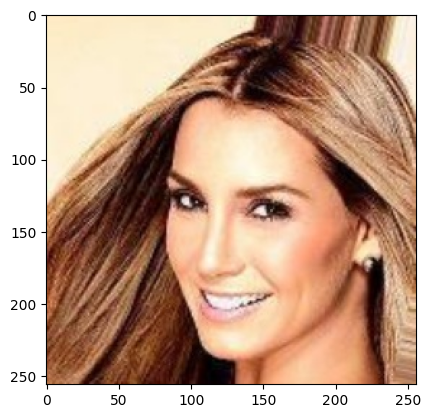

In [11]:
import matplotlib.pyplot as plt

plt.imshow(img)